<h3 style="text-align: center;"> <strong> UNIVERSIDAD TECNOLÓGICA DE PANAMÁ </strong></h3>
<h3 style="text-align: center;">FACULTAD DE INGENIERÍA DE SISTEMAS COMPUTACIONALES</h3>
<h3 style="text-align: center;">MAESTRÍA EN ANALÍTICA DE DATOS</h3>
    
<h1 style="text-align: center;"><strong>-----LABORATORIO N°3:  APRENDIZAJE SUPERVISADO 2-----</strong></h1>
<h3 style="text-align: center;">MACHINE LEARNING Y ANALITICA PRESCRIPTIVA - S108</h3>




|  **FACILITADOR** | Dr. José Carlos Rangel Ortiz          |
|-----------------|---------------------------------------|
| **MÓDULO 2**    | Clasificadores  |
|  **UNIDAD 1**    | Algoritmos de Aprendizaje Supervisado |
    

| **NOMBRE DEL ESTUDIANTE:** | STEPHANIE DE LEON 8-856-600______________________________|
|----------------------------|-----------------------------------------------------------------------------------------|

# Introducción 


El Aprendizaje Automático(ML) y la Ciencia de Datos se entrelazan como dos piezas de un rompecabezas, formando una poderosa herramienta para la extracción de conocimiento a partir de datos. El ML enriquece el campo de la Ciencia de Datos, impulsando el análisis y la toma de decisiones informadas.

El ML dota a los científicos de datos de algoritmos inteligentes que pueden aprender de grandes conjuntos de datos sin necesidad de una programación explícita. Estos algoritmos son capaces de identificar patrones complejos, realizar predicciones y tomar decisiones autónomas, lo que permite a los científicos de datos:

- Automatizar tareas tediosas
- Descubrir patrones ocultos
- Realizar predicciones precisas
- Realizar predicciones precisas

**Casos de uso del Aprendizaje Automático en la Ciencia de Datos**

- Análisis de fraude
- Recomendación de productos
- Detección de anomalías
- Segmentación de clientes
- Reconocimiento de imágenes

En este laboratorio se utilizarán los algoritmos de Support Vector Machines y de Redes Neuronales (Perceptron Multicapa). Estos algoritmos forman parte del grupo de los algoritmos supervisados y pueden ser utilizados en enfoques de regresión y clasificación. 
En el caso del desarrollo de Redes Neuronales, se estarán utilizando códigos de SciKitLearn así como también TensorFlow, haciendo enfásis en las diferencias de estos al momento de obtener nuestros resultados. El algoritmo de Regresión Lineal de SciKitLearn calcula estos parámetros que representan los datos de entrenamiento. Estas librerías aportan diferentes niveles de control sobre los paramétros y opciones del algoritmo. 



<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 1 </h1>
    <h2 style="font-size: 1.5em; "><strong>Support Vectors Machines</strong></h2>
</div>


## Importar Librerias

In [2]:
!pip install palmerpenguins

  Using cached palmerpenguins-0.1.4-py3-none-any.whl.metadata (2.0 kB)
Using cached palmerpenguins-0.1.4-py3-none-any.whl (17 kB)


In [88]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt 

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

import palmerpenguins


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un modelo de SVM para la predicción de la Especie del Pinguino usando solo los datos numéricos presentes en el dataset. </h1>
</div>

**obs.** Retirar también la variable 'year' del dataset

## **[1]** Cargue el dataset y elimine los NaNs si existen

In [6]:
penguins_file = pd.read_csv('penguins_size.csv')
penguins_file.head()



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
penguins_clean_df = penguins_file.dropna()
print(f"Filas originales: {len(penguins_file)}")
print(f"Filas después de eliminar nulos(NaN): {len(penguins_clean_df)}")

Filas originales: 344
Filas después de eliminar nulos(NaN): 334


## **[2]** Genere el dataset solo con las variables numéricas (función **.drop()**), separe X & Y para el entrenamiento

In [8]:
penguins_clean_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
penguins_no = penguins_clean_df.drop(columns=penguins_clean_df.select_dtypes(exclude=['number']).columns)
print(penguins_no.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0


In [11]:
# X: Descriptores 
X = penguins_no

# y: objetivo 
y = penguins_clean_df['species']

print("Forma de X:", X.shape)  
print("Forma de y:", y.shape)  

Forma de X: (334, 4)
Forma de y: (334,)


In [12]:
# Dividir en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **[3]** Aplique el Escalado a los datos

In [16]:
scaler = StandardScaler()
penguins_no = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
X_train[penguins_no] = scaler.fit_transform(X_train[penguins_no])
X_test[penguins_no] = scaler.transform(X_test[penguins_no])

print(X_train.head())

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
230         -0.596447        -1.743053           0.921649       4650.0
84          -1.265806         0.327614          -0.724133       3350.0
303          1.095541        -0.631963           1.637206       5350.0
22          -1.526111         1.034672          -0.867245       3800.0
29          -0.670821         0.883159          -1.511246       3950.0


## **[4]** Entrene el modelo de predicción mediante SVM

In [ ]:
svm = SVC(kernel="poly", C=1, gamma="scale")  
svm.fit(X_train, y_train)
output = svm.predict(X_test)

## **[5]** Calcule el *score* de su modelo

In [19]:
test_score = svm.score(X_test, y_test)

print("Test Accuracy:", test_score)

Test Accuracy: 0.7313432835820896


## **[6]** Imprima las predicciones de categorías para las instancias usadas para el entrenamiento

In [21]:
y_train_pred = svm.predict(X_train)

print("Predicciones de categorias del entrenamiento:")
print(y_train_pred)

Predicciones de categorias del entrenamiento:
['Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Ade

In [22]:
output_train = pd.DataFrame({
    "Real": y_train,
    "Predicho": y_train_pred
})

print(output_train.head(20))  

          Real Predicho
230     Gentoo   Gentoo
84      Adelie   Adelie
303     Gentoo   Gentoo
22      Adelie   Adelie
29      Adelie   Adelie
257     Gentoo   Gentoo
335     Gentoo   Gentoo
244     Gentoo   Gentoo
183  Chinstrap   Adelie
88      Adelie   Adelie
117     Adelie   Adelie
149     Adelie   Adelie
247     Gentoo   Gentoo
122     Adelie   Adelie
146     Adelie   Adelie
182  Chinstrap   Adelie
96      Adelie   Adelie
322     Gentoo   Gentoo
265     Gentoo   Gentoo
36      Adelie   Adelie


## **[7]** Genere la matriz de confusión del modelo

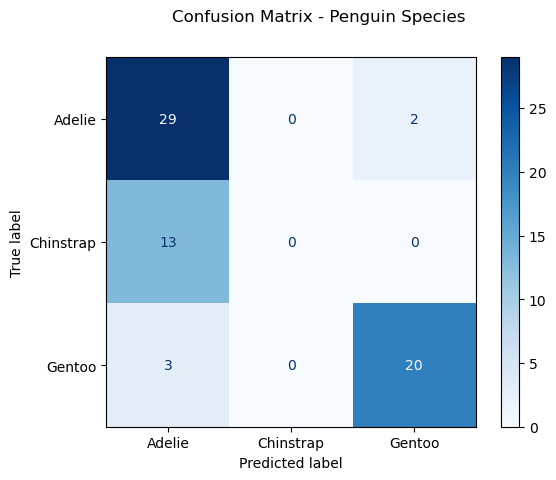

In [24]:
categorias = ["Adelie", "Chinstrap", "Gentoo"]

fig = ConfusionMatrixDisplay.from_estimator(
    svm,              
    X_test,           # features from test set
    y_test,           # true labels from test set
    display_labels=categorias,
    cmap="Blues"
)

fig.figure_.suptitle("Confusion Matrix - Penguin Species")
plt.show()

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Convierta las variables categóricas Sex e Isla a un formato numérico y entrene un nuevo clasificador para la especie del pinguino </h1>
</div>


## **[8]** Cargue el Dataset y separe las secuencias X & Y para el entrenamiento.

In [25]:
penguins_file2 = pd.read_csv('penguins_size.csv')
penguins_file2 = penguins_file2.dropna()
penguins_file2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [31]:
# Separación secuencia X
X_penguins2 = penguins_file2.drop(['species'],  axis='columns')
X_penguins2


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [27]:
# Separación secuencia y
y_penguins2 = penguins_file2.species
y_penguins2

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

## **[9]** Aplique el LabelEncoder

In [37]:
label_encoder = preprocessing.LabelEncoder()
X_penguins2_encoded = X_penguins2.copy()
X_penguins2_encoded['island'] = label_encoder.fit_transform(X_penguins2['island'])
X_penguins2_encoded['sex'] = label_encoder.fit_transform(X_penguins2['sex'])
X_penguins2_encoded

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
4,2,36.7,19.3,193.0,3450.0,1
5,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,1
340,0,46.8,14.3,215.0,4850.0,1
341,0,50.4,15.7,222.0,5750.0,2
342,0,45.2,14.8,212.0,5200.0,1


## **[10]** Aplique el Escalado a los datos

In [39]:
# Identificar columnas numéricas (excluyendo las ya codificadas)
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['island', 'sex']

# Aplicar escalado solo a las columnas numéricas
scaler = StandardScaler()
X_penguins2_scaled = X_penguins2_encoded.copy()
X_penguins2_scaled[numeric_columns] = scaler.fit_transform(X_penguins2_encoded[numeric_columns])

# Mostrar resultados
print("Datos procesados:")
print(X_penguins2_scaled.head())
print("\nTipos de datos:")
print(X_penguins2_scaled.dtypes)


Datos procesados:
   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2         -0.897653         0.783487          -1.429521    -0.571229   
1       2         -0.824290         0.121896          -1.072408    -0.509011   
2       2         -0.677564         0.427246          -0.429605    -1.193405   
4       2         -1.337831         1.088836          -0.572450    -0.944535   
5       2         -0.860972         1.750427          -0.786718    -0.695664   

   sex  
0    2  
1    1  
2    1  
4    1  
5    2  

Tipos de datos:
island                 int32
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int32
dtype: object


## **[11]** Divida esta secuencia en Train/Test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_penguins2_scaled,  # Datos escalados
    y_penguins2,         # Variable objetivo
    test_size=0.2,       # 20% para test
    random_state=42,     # Semilla para reproducibilidad
)

## **[12]** Entrene el modelo de predicción mediante SVM, con kernel RBF

In [41]:
svm_peng = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_peng.fit(X_train, y_train)

y_pred = svm_peng.predict(X_test)

## **[13]** Genere Predicciones basadas en su conjunto de prueba

In [42]:
y_train_pred = svm_peng.predict(X_train)

print("Predicciones de categorias del entrenamiento:")
print(y_train_pred)

Predicciones de categorias del entrenamiento:
['Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie'
 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinst

In [43]:
# Validación de predicciones contra lo real. 

output_train = pd.DataFrame({
    "Real": y_train,
    "Predicho": y_train_pred
})

print(output_train.head(20))  

          Real   Predicho
230     Gentoo     Gentoo
84      Adelie     Adelie
303     Gentoo     Gentoo
22      Adelie     Adelie
29      Adelie     Adelie
257     Gentoo     Gentoo
335     Gentoo     Gentoo
244     Gentoo     Gentoo
183  Chinstrap  Chinstrap
88      Adelie     Adelie
117     Adelie     Adelie
149     Adelie     Adelie
247     Gentoo     Gentoo
122     Adelie     Adelie
146     Adelie     Adelie
182  Chinstrap     Adelie
96      Adelie     Adelie
322     Gentoo     Gentoo
265     Gentoo     Gentoo
36      Adelie     Adelie


## **[14]** Calcule el *score* de su modelo 

In [44]:
test_score = svm_peng.score(X_test, y_test)

print("Test Accuracy:", test_score)

Test Accuracy: 1.0


## **[15]** Genere la matriz de confusión de los datos de test 

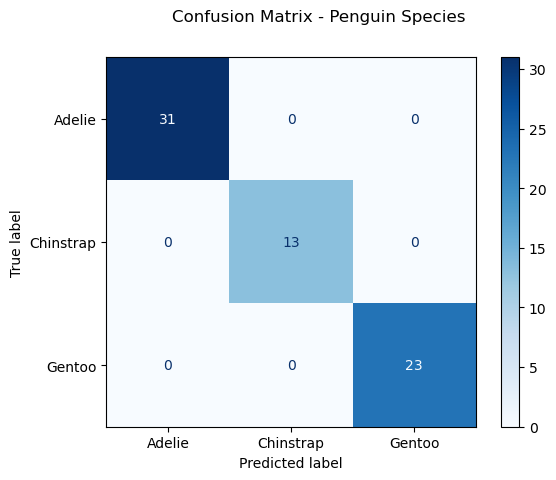

In [45]:

categorias = ["Adelie", "Chinstrap", "Gentoo"]

fig = ConfusionMatrixDisplay.from_estimator(
    svm_peng,              # your trained SVM model
    X_test,           # features from test set
    y_test,           # true labels from test set
    display_labels=categorias,
    cmap="Blues"
)

fig.figure_.suptitle("Confusion Matrix - Penguin Species")
plt.show()

<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 2 </h1>
    <h2 style="font-size: 1.5em; "><strong>Redes Neuronales</strong></h2>
</div>


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cáncer de Seno entrene un modelo mediante una Red Neuronal con SKLearn que permita diagnosticar la enfermedad basada en datos de entrada
 </h1>
</div>


## **[16]** Cargue el dataset y elimine los NaNs de ser necesario

In [46]:
b_cancer_df = pd.read_csv('Breast_cancer_data.csv')
b_cancer_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [47]:
b_cancer__cleandf = b_cancer_df.dropna()
print(f"Filas originales: {len(b_cancer_df)}")
print(f"Filas después de eliminar nulos(NaN): {len(b_cancer__cleandf)}")

Filas originales: 569
Filas después de eliminar nulos(NaN): 569


## **[17]** Genere el las secuencias X & Y para entrenar el modelo

In [48]:
X= b_cancer__cleandf.drop(['diagnosis'],  axis='columns')
y= b_cancer__cleandf.diagnosis

## **[18]** Aplique el escalado a los datos

In [49]:
scaler_bc = StandardScaler()
X_train = scaler_bc.fit_transform(X_train)
X_test = scaler_bc.transform(X_test)

## **[19]** Divida el dataset en conjunto de Train y Test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **[20]** Entrene el modelo de predicción mediante MLP de SKLearn

In [52]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)

#Predictions
y_pred = mlp.predict(X_test)

## **[21]** Calcule el *score* de su modelo

In [53]:
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.8571428571428571
Test Accuracy: 0.9210526315789473


## **[22]** Genere la matriz de confusión de los datos de test 

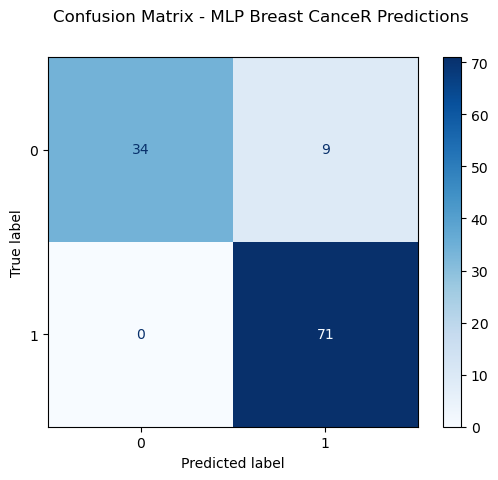

In [55]:
disp = ConfusionMatrixDisplay.from_estimator(
    mlp, X_test, y_test, cmap="Blues"
)
disp.figure_.suptitle("Confusion Matrix - MLP Breast CanceR Predictions")
plt.show()

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cancer de Seno entrene un modelo mediante una Red Neuronal con TensorFlow que permita diagnosticar la enfermedad basada en datos de entrada
 </h1>
</div>


## **[23]** Defina el modelo de la Arquitectura del la red

In [58]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB 1.9 MB/s eta 0:02:53
   ---------------------------------------- 0.2/331.8 MB 2.0 MB/s eta 0:02:49
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


model = Sequential()
model.add(keras.Input(shape=(5,)))
model.add(Dense(12,  kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer='uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer='uniform' , activation= 'sigmoid' ))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

## **[24]** Compile el modelo 

In [65]:
# Compilar modelo
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

## **[25]** Entrene su modelo de MLP

In [66]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=250, batch_size=10)

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7143 - loss: 0.6917 
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5626 - loss: 0.6792 
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6418 - loss: 0.6540
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.5831
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.4767 
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4187
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8132 - loss: 0.4169 
Epoch 8/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.3817
Epoch 9/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.3863
Epoch 10/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.3849
Epoch 11/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.3750
Epoch 12/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

## **[26]** Calcule el *score* de su modelo

In [69]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9035 - loss: 0.2303  
compile_metrics: 90.35%


## **[27]** Realice las predicciones con su modelo utilizando la secuencia de test 

In [71]:
prediccion = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


## **[28]** Genere la matriz de confusión de los datos de test 
**Obs.** En este caso para generar la matriz de confusión debe utilizar el método *from_predictions()*, utilizando la lista de predicciones y el valor real de cada instancia. 

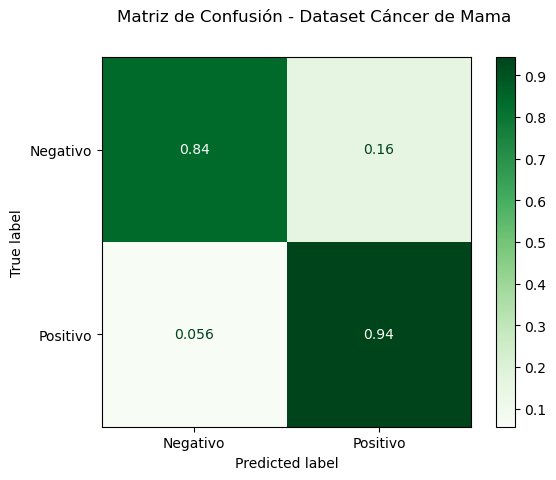

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generar matriz de confusión con las variables CORRECTAS
categorias = ['Negativo', 'Positivo']  # 0 = Negativo, 1 = Positivo

fig = ConfusionMatrixDisplay.from_predictions(
    y_test,                # Valores REALES del test set
    prediccion.flatten(),  # Predicciones (aplanar el array 2D a 1D)
    display_labels=categorias, 
    cmap="Greens", 
    normalize='true'
)  

fig.figure_.suptitle("Matriz de Confusión - Dataset Cáncer de Mama")
plt.show()

# Clasificación Multiclase
<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un clasificador de la isla de los pinguinos usando todas las columnas del dataset a excepción del año. Use un MLP de TensorFlow </h1>
</div>

## **[29]** Cargue el dataset y elimine los NaNs de ser necesario

In [73]:
penguins_file = pd.read_csv('penguins_size.csv')
penguins_file.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [74]:
penguins_clean_df = penguins_file.dropna()
print(f"Filas originales: {len(penguins_file)}")
print(f"Filas después de eliminar nulos(NaN): {len(penguins_clean_df)}") 

Filas originales: 344
Filas después de eliminar nulos(NaN): 334


In [75]:
# Verificar si existe la columna 'YEAR' y quitarla si existe
if 'YEAR' in penguins_clean_df.columns:
    penguins_clean_df = penguins_clean_df.drop('YEAR', axis=1)
    print("Columna 'YEAR' eliminada")
else:
    print("La columna 'YEAR' no existe en el dataset")

La columna 'YEAR' no existe en el dataset


## **[30]** Genere el las secuencias X & Y para entrenar el modelo

In [76]:
X = penguins_clean_df.drop('species', axis=1)
y = penguins_clean_df['species']

## **[31]** Aplique el LabelEncoder

In [81]:
label_encoder = LabelEncoder()
X['island'] = label_encoder.fit_transform(X['island'])
X['sex'] = label_encoder.fit_transform(X['sex'])


## **[32]** Aplicación de Escalado

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **[33]** Aplique One Hot Encoding

In [90]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))
print('Ejemplo de categorías o etiquetas en formato OHE: ')
print(y[0])

Ejemplo de categorías o etiquetas en formato OHE: 
[1. 0. 0.]


## **[34]** Divida el dataset en conjunto de Train y Test

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

## **[35]** Defina el modelo de la Arquitectura de la red

In [92]:
model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))  
model.add(Dense(10, activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))  # 3 neuronas para 3 especies

## **[36]** Compile el modelo 

In [94]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print('Resumen del modelo de Red Neuronal: ')
model.summary()

Resumen del modelo de Red Neuronal: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

## **[37]** Entrene su modelo de MLP

In [95]:
model.fit(X_train, y_train, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
54/54 - 1s - 18ms/step - accuracy: 0.5581 - loss: 1.1465
Epoch 2/200
54/54 - 0s - 2ms/step - accuracy: 0.6891 - loss: 0.9269
Epoch 3/200
54/54 - 0s - 2ms/step - accuracy: 0.8839 - loss: 0.6662
Epoch 4/200
54/54 - 0s - 2ms/step - accuracy: 0.9551 - loss: 0.4219
Epoch 5/200
54/54 - 0s - 2ms/step - accuracy: 0.9663 - loss: 0.2669
Epoch 6/200
54/54 - 0s - 2ms/step - accuracy: 0.9775 - loss: 0.1759
Epoch 7/200
54/54 - 0s - 2ms/step - accuracy: 0.9850 - loss: 0.1228
Epoch 8/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0904
Epoch 9/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0702
Epoch 10/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0566
Epoch 11/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0473
Epoch 12/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0403
Epoch 13/200
54/54 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0357
Epoch 14/200
54/54 - 0s - 3ms/step - accuracy: 0.9925 - loss: 0.0316
Epoch 15/200
54/54 - 0s - 2ms/step - accur

## **[38]** Calcule el *score* de su modelo

In [96]:
results = model.evaluate(X_test, y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 1.1766e-05 
Final test set loss: 0.000012
Final test set accuracy: 1.000000


## **[39]** Calcular predicciones para la secuencia de test

In [97]:
predicciones = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


## **[40]** Procesar listas en OHE a listas de numéricas

In [98]:
predList=np.argmax(predicciones, axis=-1)

## **[41]** Genere la matriz de confusión de los datos de test 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


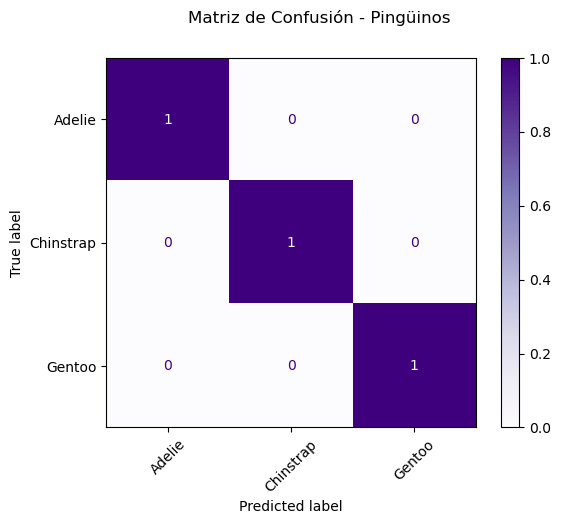

In [99]:
# Obtener predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir one-hot a labels
y_true_classes = np.argmax(y_test, axis=1)   # Convertir one-hot a labels

# Obtener nombres de las categorías (especies)
categorias = penguins_clean_df['species'].unique()

# Generar matriz de confusión
fig = ConfusionMatrixDisplay.from_predictions(
    y_true_classes, 
    y_pred_classes,
    display_labels=categorias, 
    cmap="Purples", 
    normalize='true'
) 
fig.figure_.suptitle("Matriz de Confusión - Pingüinos")
plt.xticks(rotation=45)
plt.show()

# Redes Neuronales Recurrentes
<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilización de Series temporales </h1>
</div>

## **[42]** Utilizando el Codigo presentado en el ejemplo modique el tamaño de la secuencia y compare los resultados
Obs. Puede añadir a esta sección las celdas de código que necesite.

In [100]:
datosDT = pd.read_csv('daily-minimum-temperatures-in-me.csv')

# Extraer la columna con la serie
datosTempo = datosDT.iloc[:,1]

# Asegurar el tipo de dato flotante 
datosTempo = pd.to_numeric(datosTempo, errors='coerce', downcast='float')
datosTempo = datosTempo.dropna()  # Eliminar valores NaN si los hay

In [102]:
# Crear secuencias de entrada y etiquetas
sequence_length = 7  # Cambiado de 10 a 7

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(np.array(datosTempo), sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Añadir dimensión para LSTM

In [103]:
y

array([17.4, 21.8, 20. , ..., 13.5, 15.7, 13. ], dtype=float32)

In [104]:
# Dividir en entrenamiento y prueba
split = int(len(X) * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [106]:
from tensorflow.keras.layers import LSTM, Dense
# Construcción del modelo LSTM
model = Sequential([
    keras.Input(shape=(sequence_length,1)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(20, activation='relu'),
    Dense(48),
    Dense(1)
])

model.summary()
model.compile(optimizer='adam', loss='mse')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 48)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,137 (66.94 KB)

 Trainable params: 17,137 (66.94 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint


# Configurar checkpoints
checkpoint = ModelCheckpoint('model_checkpoint_{epoch}.keras', save_best_only=True, monitor='val_loss', mode='min')

In [110]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 26.8464 - val_loss: 6.7207
Epoch 2/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1277 - val_loss: 6.1021
Epoch 3/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4981 - val_loss: 5.7144
Epoch 4/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4286 - val_loss: 6.1962
Epoch 5/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3232 - val_loss: 5.9211
Epoch 6/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2198 - val_loss: 5.7498
Epoch 7/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3622 - val_loss: 5.9126
Epoch 8/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2075 - val_loss: 5.4915
Epoch 9/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1325 - val_loss: 5.6133
Epoch 10/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1837 - val_loss: 5.7338
Epoch 11/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2602 - val_loss: 5.4901
Epoch 12/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1747 - val

In [111]:
# Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test, batch_size=16)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [113]:
from sklearn.metrics import mean_squared_error
# Calcular métrica de evaluación (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE) con sequence_length={sequence_length}: {mse}')

Error cuadrático medio (MSE) con sequence_length=7: 5.72440767288208


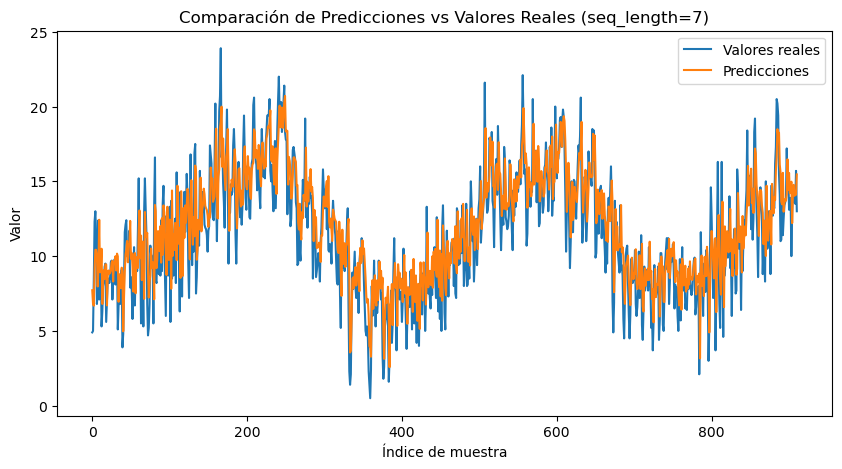

In [114]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title(f'Comparación de Predicciones vs Valores Reales (seq_length={sequence_length})')
plt.show()

## **[43]** Utilizando como modelo el modelo LSTM del ejemplo, seleccione un dataset de la carpeta suministrada y entrene un nuevo modelo, modificando la arquitectura de la red. 
Obs. Puede añadir a esta sección las celdas de código que necesite.

In [ ]:
datosEP = pd.read_csv('Electric_Production.csv')
datosEP.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [119]:
# Extraer la columna con la serie (IPG2211A2N)
datosTempo = datosEP.iloc[:, 1]  # Segunda columna con los valores de producción

# Asegurar el tipo de dato flotante 
datosTempo = pd.to_numeric(datosTempo, errors='coerce', downcast='float')
datosTempo = datosTempo.dropna()  # Eliminar valores NaN si los hay


In [120]:
# Crear secuencias de entrada y etiquetas
sequence_length = 7  # Tamaño de secuencia

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(np.array(datosTempo), sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Añadir dimensión para LSTM


In [121]:
# Dividir en entrenamiento y prueba
split = int(len(X) * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [122]:
# Construcción del modelo LSTM
model = Sequential([
    keras.Input(shape=(sequence_length,1)),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(20, activation='relu'),
    Dense(48),
    Dense(1)
])

In [123]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 48)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,137 (66.94 KB)

 Trainable params: 17,137 (66.94 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model.compile(optimizer='adam', loss='mse')

In [125]:
# Configurar checkpoints
checkpoint = ModelCheckpoint('model_checkpoint_{epoch}.keras', save_best_only=True, monitor='val_loss', mode='min')

In [126]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 5108.7466 - val_loss: 3279.8914
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 833.3514 - val_loss: 644.8978
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 252.5988 - val_loss: 150.8569
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 52.8457 - val_loss: 85.0997
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 43.1872 - val_loss: 57.9498
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.2440 - val_loss: 56.3970
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35.6688 - val_loss: 55.0791
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 32.1180 - val_loss: 49.6043
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.0799 - val_loss: 41.6330
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26.5002 - val_loss: 38.4255
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.8370 - val_loss: 35.2617
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━

In [127]:
# Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test, batch_size=16)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [128]:
# Calcular métrica de evaluación (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 29.854415893554688


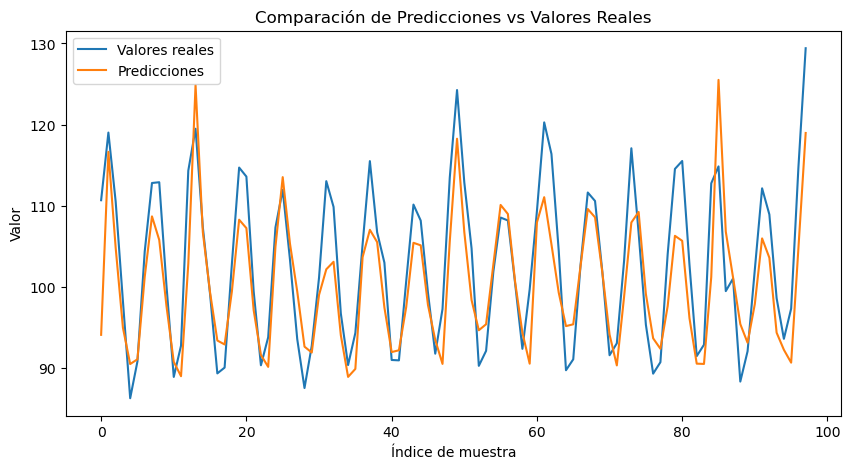

In [129]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()


## **[44]** Conclusiones 